## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print(X.isnull().mean(), "Пропущенных значений, как видим, нет")

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
dtype: float64 Пропущенных значений, как видим, нет


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


Xtrain=np.vstack((X_train['alcohol'],X_train['magnesium'])).T
Xtest=np.vstack((X_test['alcohol'],X_test['magnesium'])).T

normalizer = preprocessing.StandardScaler()

X_real_norm_np = normalizer.fit_transform(Xtrain)
Xtrain = pd.DataFrame(data=X_real_norm_np)

X_real_norm_np = normalizer.fit_transform(Xtest)
Xtest = pd.DataFrame(data=X_real_norm_np)

range1 = [1, 3, 5, 10, 15, 25]
print(X_train.shape, y_train.shape)
print('NN: Train; Test')
for k in range1:
    y1_predicted = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(Xtrain, y_train).predict(Xtrain)
    y2_predicted = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(Xtrain, y_train).predict(Xtest)
    print(f"{k}:  {np.mean(y1_predicted==y_train):.2f};  {np.mean(y2_predicted==y_test):.2f}")


(124, 13) (124,)
NN: Train; Test
1:  1.00;  0.65
3:  0.82;  0.69
5:  0.81;  0.74
10:  0.76;  0.70
15:  0.74;  0.70
25:  0.74;  0.70


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [6]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

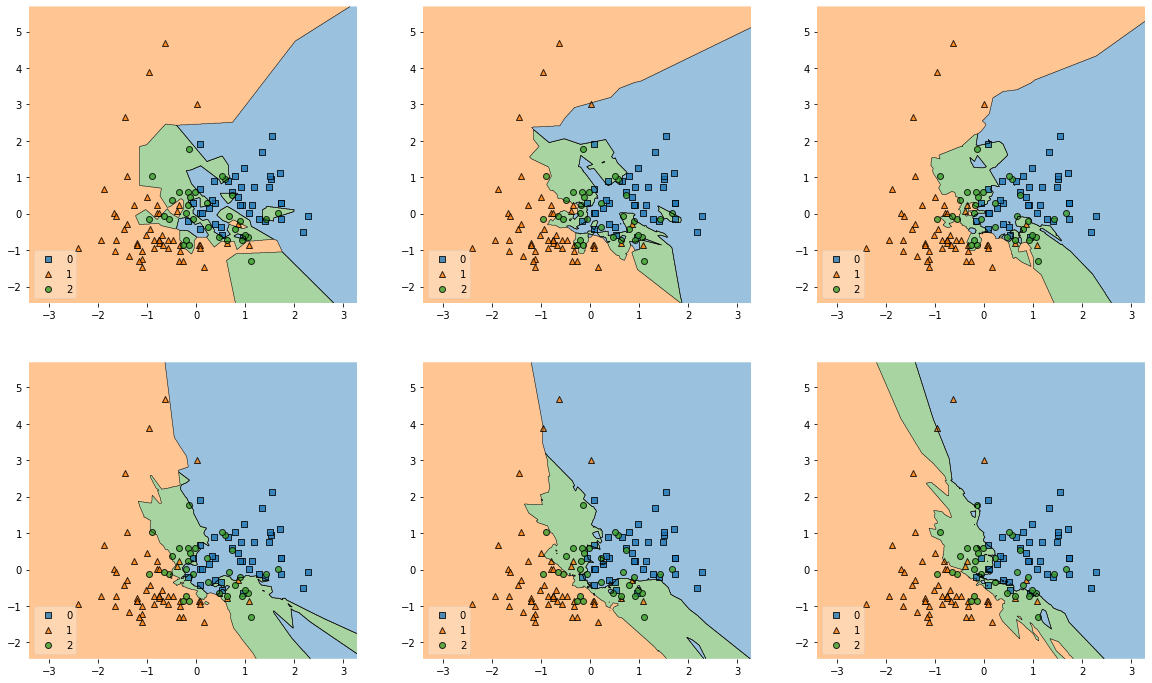

In [8]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
import itertools
import pylab

clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean').fit(Xtrain, y_train)#.predict(X_test)
clf2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(Xtrain, y_train)
clf3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(Xtrain, y_train)
clf4 = KNeighborsClassifier(n_neighbors=10, metric='euclidean').fit(Xtrain, y_train)
clf5 = KNeighborsClassifier(n_neighbors=15, metric='euclidean').fit(X_train, y_train)
clf6 = KNeighborsClassifier(n_neighbors=25, metric='euclidean').fit(X_train, y_train)

fig = plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(2,3, figure=fig)
a=0
b=1
labels = ['n_neighbors=1', 'n_neighbors=3', 'n_neighbors=5', 'n_neighbors=10', 'n_neighbors=15', 'n_neighbors=25']
for clf, lbl, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([a,b], [0, 1, 2])):
    clf.fit(Xtrain, y_train)      
    ax = plt.subplot(gs[grd[a], grd[b]])
    fig = plot_decision_regions(X=Xtrain.to_numpy(), y=y_train, clf=clf, legend=3)

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [42]:
print("При малых k решающая поверхность получается слишком сложной, поскольку шумы оказывают чересчур большое воздействие."
      "Однако при росте k график сглаживается и при k=15 поверхность оказывается наиболее разумной. При больших k (k=25) "
      "зеленый класс захватывает пространвстово оранжевого и синего классов. Потому оптимальным будет число соседей, равное 15.")

При малых k решающая поверхность получается слишком сложной, поскольку шумы оказывают чересчур большое воздействие.Однако при росте k график сглаживается и при k=15 поверхность оказывается наиболее разумной. При больших k (k=25) зеленый класс захватывает пространвстово оранжевого и синего классов. Потому оптимальным будет число соседей, равное 15.


### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

(20, 2)

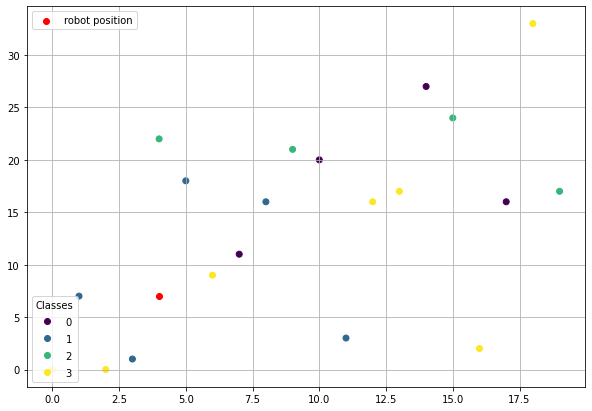

In [545]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

X = np.vstack((x,landmarks)).T
X.shape

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [514]:
from sklearn.neighbors import KNeighborsClassifier
robot.initial_position.shape, robot.mapping[0].shape, 
robot.initial_position.ndim, robot.trajectory.ndim
for n in range(50):
    robot.move()

In [550]:
#X = concatenate((x,landmarks))
class MobileRobot():
    def __init__(self, k:int, initial_position:list, landmarks:list, classes:list):
        self.k = k
        self.initial_position = np.array(initial_position).reshape(1, -1)
        self.landmarks = np.array(landmarks)
        self.classes = np.array(classes)
        
        self.trajectory = np.array(initial_position).reshape(1, -1)
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
      
        self.mapping = {0: np.array([1, 0]), #перемещения робота в соответствие с тем, какого класса он окажется
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}    
    def move(self):
        choice = np.random.binomial(1, 0.2,1) #0 с вероятность 0.8, 1 - с 0.2
        if choice == 0:
            movement_class = self.knn.predict(self.initial_position) # this is class of the object
            movement = self.mapping[movement_class[0]]
            #print('1)movement_class =', movement_class, 'initial_pos:', self.initial_position[0,1])
        else:                                  #choice = 1, движение вправо
            movement = self.mapping[0]
        #print("2)choice =", choice, 'movement:', movement,'trajectory:', self.trajectory)
        
        self.initial_position[0,0] = self.initial_position[0,0]+movement[0] #не работает
        self.initial_position[0,1] = self.initial_position[0,1]+movement[1]
        #print('initial_pos(0):', self.initial_position[0])
        self.trajectory = np.vstack((self.trajectory, self.initial_position[0]))
        #print(self.trajectory)


**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [551]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory# <ВАШ КОД ЗДЕСЬ>
    #print('traj:', traj)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()
robot.initial_position[0,0],robot.initial_position[0],robot.trajectory.shape

(377, array([377,  45]), (3, 2))

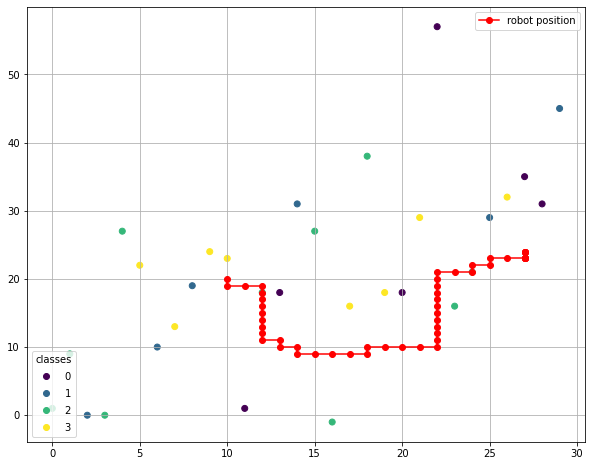

In [552]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)#, plot_decision_regions(X=X, y=random_classes, clf=robot.knn, legend=2)
#robot.trajectory
 

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

При максимальном k график идет в соответствие с преобладующим классом - движение вниз в 80% случаев, в 20% - вправо(первый график)

При k=1 решающую роль играет случайность: так примерно на отметке х=17 (рядом с первой желтой точкой) без случайности график двигался вниздо тех пор, пока не оказался бы в поле зеленого класса (т.е. движение вниз) и дальше бы отправился вверх, столкнулся бы с желтым классом, отправился вниз и так и не вышел с этого участка между классами 'вверх' и 'вниз'. Таким образом, случайность позволяет не замкнуться в цикле на соседствующих участках классов'вверх'-'вниз', а дает шанс выйти из этого замкнутого круга. Однако при попадании в похожую зону между классами 'вправо'-'влево' случайный выбор не дает никаких преимуществи мы попадаем в замкнутый цикл, как это происходит при k=2 и при k=1 на третьем и четвертом графике. Учитывая, что количесвто шагов на втором и двух последних графиков одинаковобольшое, на втором графике замкнутого цикла нет и обилие точек превра

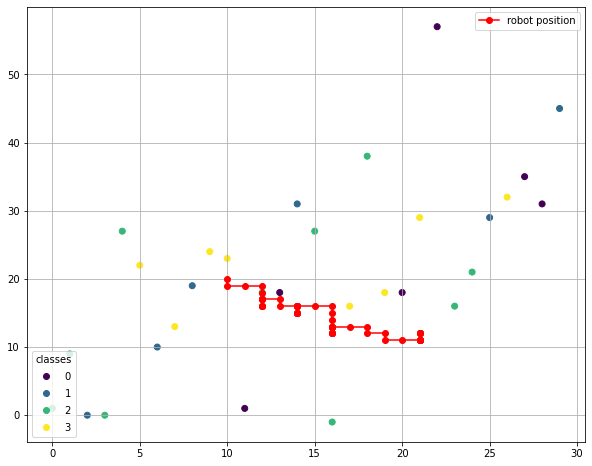

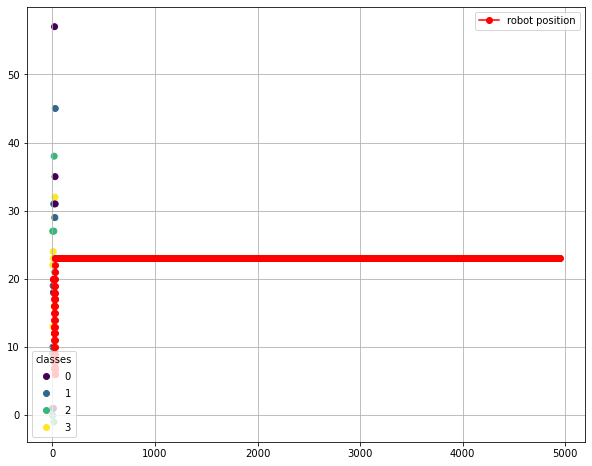

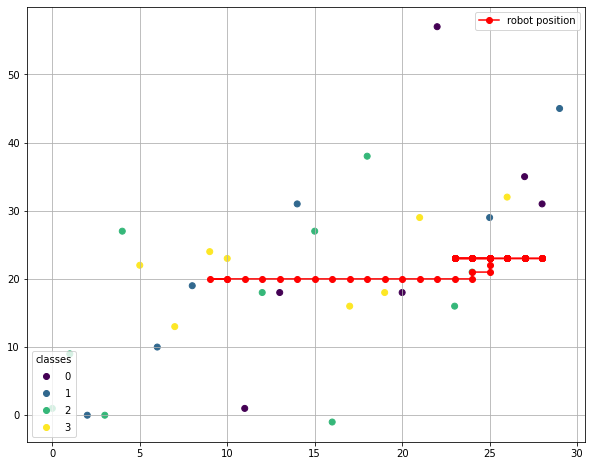

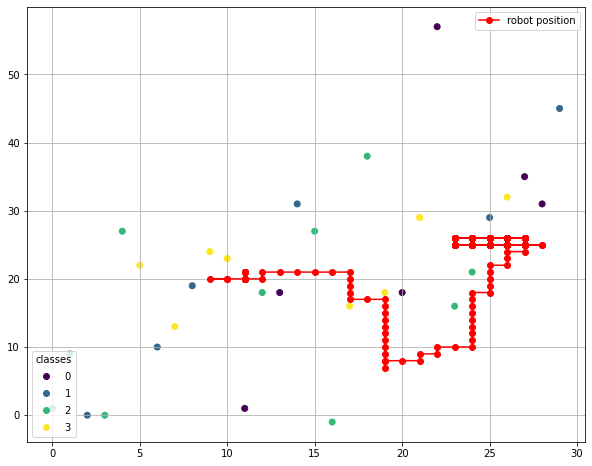

In [577]:
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)
print('При максимальном k график идет в соответствие с преобладующим классом - движение вниз в 80% случаев, в 20% - вправо(первый график)\n')

conduct_experiment(x, mean = 3, std = 10, k = 4, n_movements = 5000)
#conduct_experiment(x, mean = 3, std = 10, k = 2, n_movements = 150)
conduct_experiment(x, mean = 3, std = 10, k = 2, n_movements = 5000)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 5000)
print("При k=1 решающую роль играет случайность: так примерно на отметке х=17 (рядом с первой желтой точкой) без случайности график двигался вниз"
     " до тех пор, пока не оказался бы в поле зеленого класса (т.е. движение вниз) и дальше бы отправился вверх, столкнулся бы с желтым классом, отправился вниз и так и "
     " не вышел с этого участка между классами 'вверх' и 'вниз'. Таким образом, случайность позволяет не замкнуться в цикле на соседствующих участках классов"
     " 'вверх'-'вниз', а дает шанс выйти из этого замкнутого круга. Однако при попадании в похожую зону между классами 'вправо'-'влево' случайный выбор не дает никаких преимуществ"
     " и мы попадаем в замкнутый цикл, как это происходит при k=2 и при k=1 на третьем и четвертом графике. Учитывая, что количесвто шагов на втором и двух последних графиков одинаково"
      " большое, на втором графике замкнутого цикла нет и обилие точек превращается в толстую линию, на последних же двух графиков робот не смог выйти из цикла и случайность не сыграла"
     " никакой роли, потому мы четко можем различить основные позиции робота."
     "\n\nДобавлю, что такое происходит именно когда робот, выйдя с территории 'вправо' (действие происходиит на правой стороне поля), оказался на территории класса 'влево', "
      " и при вероятности двинутся не влево (чтобы не попасть в предыдущую точку, еоторая вернет его обратно же), которая составляет лишь 20%, мы можем пойти дальше, но поскольку она"
     " невелика, то мы и замыкаемся. При большем числе соседей длина цепочки увеличивается незначительно (на один шаг вправо стало больше, если сравнивать n=150 (закомментировано) "
     " и n=5000 для k=2). При осознанном выборе случайностей и добавления случайности вверх или вниз(одного из них достаточно) можно было бы избежать замкнутых циклов."
     "\n\nЕсли слвсем убрать случайности, то появятся замкнутые циклы вверх-вниз либо вправо-влево.")

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [168]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [169]:
print(data.isnull().mean(), "Пропущенных значений, как видим, нет")

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64 Пропущенных значений, как видим, нет


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [170]:
data=data.drop('Unnamed: 0', axis=1)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [171]:
y = data.price #определили целевую переменную как у
data=data.drop('price', axis=1)
X=data
print("price коррелирует с carat(0.922), x(0.884), y(0.865), z(0.861)")

#решение:
np.vstack((np.corrcoef(data['carat'], y)[0,1], np.corrcoef(data['depth'], y)[0,1], np.corrcoef(data['table'], y)[0,1],np.corrcoef(data['x'], y)[0,1],np.corrcoef(data['y'], y)[0,1], np.corrcoef(data['z'], y)[0,1]))

price коррелирует с carat(0.922), x(0.884), y(0.865), z(0.861)


array([[ 0.9215913 ],
       [-0.0106474 ],
       [ 0.1271339 ],
       [ 0.88443516],
       [ 0.8654209 ],
       [ 0.86124944]])

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [172]:
data_dum=pd.get_dummies(data, drop_first=True)
data_dum.head()


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [173]:
from sklearn.model_selection import train_test_split
np.random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(data_dum, y, test_size=0.3) #, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37758, 23), (37758,), (16182, 23), (16182,))

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [174]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

normalizer = preprocessing.StandardScaler()

X_real_norm_train = normalizer.fit_transform(X_train)
X_real_norm_test = normalizer.fit_transform(X_test)
X_real_norm_train = pd.DataFrame(data=X_real_norm_train)
X_real_norm_test = pd.DataFrame(data=X_real_norm_test)
X_real_norm_train.head(5)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.927373,-0.311238,1.133187,-1.082573,-1.029988,-1.057217,-0.316707,-0.814777,1.705964,-0.538466,...,-0.425667,-0.333392,4.305040,-0.185497,1.761475,-0.453,-0.422363,-0.539407,-0.269292,-0.324393
1,-0.167973,0.247483,0.242202,-0.004751,0.020092,0.040537,-0.316707,-0.814777,1.705964,-0.538466,...,-0.425667,-0.333392,-0.232286,-0.185497,1.761475,-0.453,-0.422363,-0.539407,-0.269292,-0.324393
2,1.245357,-0.660439,-0.203290,1.340300,1.321474,1.194586,-0.316707,1.227330,-0.586179,-0.538466,...,-0.425667,-0.333392,-0.232286,-0.185497,-0.567706,-0.453,-0.422363,1.853887,-0.269292,-0.324393
3,-0.990657,-0.660439,0.242202,-1.127111,-1.164614,-1.169808,-0.316707,-0.814777,1.705964,-0.538466,...,-0.425667,-0.333392,-0.232286,-0.185497,-0.567706,-0.453,-0.422363,1.853887,-0.269292,-0.324393
4,0.971129,0.387164,-0.203290,1.010718,1.061198,1.067922,-0.316707,1.227330,-0.586179,-0.538466,...,-0.425667,-0.333392,-0.232286,-0.185497,-0.567706,-0.453,-0.422363,-0.539407,-0.269292,3.082681


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
model = LinearRegression().fit(X_real_norm_train, y_train)
print("На тренировочной: ", mean_squared_error(model.predict(X_real_norm_train), y_train))
print("На тестовой: ", mean_squared_error(model.predict(X_real_norm_test), y_test))

На тренировочной:  1295920.7310854401
На тестовой:  1267745.1088336587


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [176]:
np.random.seed(12345)
print(model.coef_, "\n\nВсего 23 коэффициента на 23 признака после Onehot-кодирования. При признаках carat(1), x(4), 18-23 признаки (это сlarity_VS1, clarity_VS2, clarity_VVS1, clarity_VVS)"
     " коэффициенты на порядок выше, чем при остальных признаках.")

[ 5363.93392431   -99.19841637   -65.08485867 -1544.20339181
   417.8699926    -33.58965226   149.25099301   379.62869677
   315.08017839   277.36948766   -85.84504554  -108.49662969
  -204.72580594  -358.56852877  -445.3207403   -533.5318589
   966.37486222  1569.7169277   1005.03788798  1638.7741563
  1783.71979788  1262.59503376  1457.90799584] 

Всего 23 коэффициента на 23 признака после Onehot-кодирования. При признаках carat(1), x(4), 18-23 признаки (это сlarity_VS1, clarity_VS2, clarity_VVS1, clarity_VVS) коэффициенты на порядок выше, чем при остальных признаках.


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [177]:
from sklearn.linear_model import Ridge, Lasso

lasso = Lasso(10.0).fit(X_train,y_train)
print ("\n---Lasso---\nTrain: {}".format(mean_squared_error(y_train, lasso.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test))))
print("Ошибка уменьшилась с 2 миллионов до ~1.5 миллиона.")

ridge = Ridge(10.0).fit(X_train,y_train)
print ("\n---Ridge---\nTrain: {}".format(mean_squared_error(y_train, ridge.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test))))
print("Ошибка уменьшилась с 2 миллионов до ~130 тысяч.")


---Lasso---
Train: 1535422.2271393712
Test: 1479024.9588247035
Ошибка уменьшилась с 2 миллионов до ~1.5 миллиона.

---Ridge---
Train: 1301060.89524619
Test: 1267830.85585206
Ошибка уменьшилась с 2 миллионов до ~130 тысяч.


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

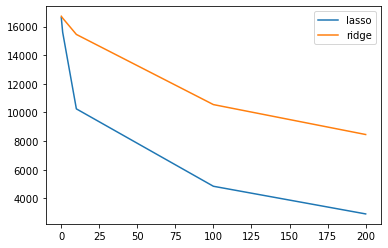

Lasso агрессивнее уменьшает веса. В Ridge по мере роста альфы веса уменьшаются, но не зануляются, и неинформативные признаки остаются. Lasso-регрессия же зануляет неинформативные признаки и с ростом альфы всё большее количество коэффициентов становится равным 0. Также из-за склонности Lasso-регрессии занулять большие коэффициенты (тем самым ликвидируем и переобучение) и сохранять значимые признаки, её часто используют для отбора признаков. И как видим из графика, lasso засчет зануления неинформативных признаков выдала более низкую норму весов, чем Ridge, что подтверждает слова о занулении неинформативных признаков с большими весами.


In [178]:
x = np.linspace(0, 200, 10)
a1=[]
a2=[]
alpha_arr = [0.1, 1.0, 10.0, 100.0, 200.0]
for k in alpha_arr:    
    lasso = Lasso(alpha=k, max_iter=5000).fit(X_train,y_train)
    a1.append(np.linalg.norm(lasso.coef_))
    ridge = Ridge(k).fit(X_train,y_train)
    a2.append(np.linalg.norm(ridge.coef_))
plt.plot(alpha_arr, a1)
plt.plot(alpha_arr, a2)
plt.legend(["lasso", "ridge"])
plt.show()   
print("Lasso агрессивнее уменьшает веса. В Ridge по мере роста альфы веса уменьшаются, но не зануляются, и неинформативные признаки "
      "остаются. Lasso-регрессия же зануляет неинформативные признаки и с ростом"
     " альфы всё большее количество коэффициентов становится равным 0. Также из-за склонности Lasso-регрессии занулять большие коэффициенты (тем самым"
      " ликвидируем и переобучение) и сохранять значимые признаки, её часто используют для отбора признаков. "
     "И как видим из графика, lasso засчет зануления неинформативных признаков выдала более низкую норму весов, чем Ridge, что подтверждает слова о занулении"
     " неинформативных признаков с большими весами.")

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [179]:
from sklearn.linear_model import LassoCV
cross_val = LassoCV(alphas=alpha_arr, cv=5, max_iter=10000).fit(X_train,y_train)
print("При последнем альфа, то есть при альфа=0.1 ошибка минимальна, следовательно, качество наибольшее:")
pd.DataFrame(cross_val.mse_path_.mean(axis=1), cross_val.alphas_)

При последнем альфа, то есть при альфа=0.1 ошибка минимальна, следовательно, качество наибольшее:


,0
200.0,3.499181e+06
100.0,2.525618e+06
10.0,1.537775e+06
1.0,1.305288e+06
0.1,1.301489e+06


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [180]:
lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train,y_train)
print("Судя по таблице значений, наиболее информативными будут признаки carat, x, clarity, color. Неинформативными оказались table, z, depth."
     "\n\n1) Depth, как величина, равная 2z / (x + y), оказывается обратно пропорционально двум значимым величинам и прямо пропорциональна z, которая при"
     " выбранном альфа практически не влияет на итоговый ответ. Получается, что и depth будет малоинформативной величиной."
     "\n\n2) Вероятно, z оказалась так мало информативной из-за того, что важную роль играет масса бриллианта, а сумма его измерений x+y+z уже становится"
      " следствием, поэтому, учитывая carat самый информативный признак, то он словно 'забрал на себя' вес коэффициента при z."
     "\n\n3) Table как 'width of top of diamond relative to widest point (43--95)', возможно, аналогично предыдущему пункту зависит от"
     "x, y, которые здесь имеют большие веса, потому как похожая на линейно зависимую величину, она была приближена к нулю."
     "\n\nТаким образом, на мой взгляд, неинформативными оказались линейно зависимые величины, которые при альфа=0.1 Лассо-регрессия постаралась свести к минимуму.")
pd.DataFrame(lasso.coef_, columns=['коэффициент'], index=data_dum.columns)

Судя по таблице значений, наиболее информативными будут признаки carat, x, clarity, color. Неинформативными оказались table, z, depth.

1) Depth, как величина, равная 2z / (x + y), оказывается обратно пропорционально двум значимым величинам и прямо пропорциональна z, которая при выбранном альфа практически не влияет на итоговый ответ. Получается, что и depth будет малоинформативной величиной.

2) Вероятно, z оказалась так мало информативной из-за того, что важную роль играет масса бриллианта, а сумма его измерений x+y+z уже становится следствием, поэтому, учитывая carat самый информативный признак, то он словно 'забрал на себя' вес коэффициента при z.

3) Table как 'width of top of diamond relative to widest point (43--95)', возможно, аналогично предыдущему пункту зависит отx, y, которые здесь имеют большие веса, потому как похожая на линейно зависимую величину, она была приближена к нулю.

Таким образом, на мой взгляд, неинформативными оказались линейно зависимые величины, которые при

,коэффициент
carat,11300.426555
depth,-70.229550
table,-29.397841
x,-1330.836953
y,333.254707
z,-44.435121
cut_Good,510.857841
cut_Ideal,767.187994
cut_Premium,712.658595
cut_Very Good,657.851844


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [184]:
model = LinearRegression().fit(X_real_norm_train, y_train) #повторим  на всякий случай
print("---LinearRegression---\nНа тренировочной: ", mean_squared_error(model.predict(X_real_norm_train), y_train))
print("На тестовой: ", mean_squared_error(model.predict(X_real_norm_test), y_test))

print("\n---Lasso-регрессия---\nНа тренировочной: ", mean_squared_error(lasso.predict(X_real_norm_train), y_train))
print("На тестовой: ", mean_squared_error(lasso.predict(X_real_norm_test), y_test))

---LinearRegression---
На тренировочной:  1295920.7310854401
На тестовой:  1267745.1088336587

---Lasso-регрессия---
На тренировочной:  41453989.70340439
На тестовой:  41047074.73129124


In [186]:
print("LinearRegression победила. Возможно, потому что у нас не все переменные демонстрируют линейную зависимость, скорее даже меньше половины, рассматривая "
     "таблицу после one-hot кодирования. Простая линейная регрессия строится на модели, где признаки линейно независимые (цвет у нас, например,"
      " не зависит от массы, clarity аналогично - а это уже целых 13 переменных), Лассо-регрессия же специльно "
     "адаптирована для данных, где наблюдается мультиколлинеарность. Потому наш случай - это скорее обычная линейная регрессия и как следствие,"
     " результат с ней на тестовой выборке лучше, чем с Лассо.")

LinearRegression победила. Возможно, потому что у нас не все переменные демонстрируют линейную зависимость, скорее даже меньше половины, рассматривая таблицу после one-hot кодирования. Простая линейная регрессия строится на модели, где признаки линейно независимые (цвет у нас, например, не зависит от массы, clarity аналогично - а это уже целых 13 переменных), Лассо-регрессия же специльно адаптирована для данных, где наблюдается мультиколлинеарность. Потому наш случай - это скорее обычная линейная регрессия и как следствие, результат с ней на тестовой выборке лучше, чем с Лассо.
